<a href="https://colab.research.google.com/github/Saxon-account/Saxon-account/blob/main/Number_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tensorflow #(This)
from tensorflow import keras

##Data Preprocessing

In [ ]:
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#Plotting
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
#Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

### Visual Representation of Data
#### Displaying a "4"

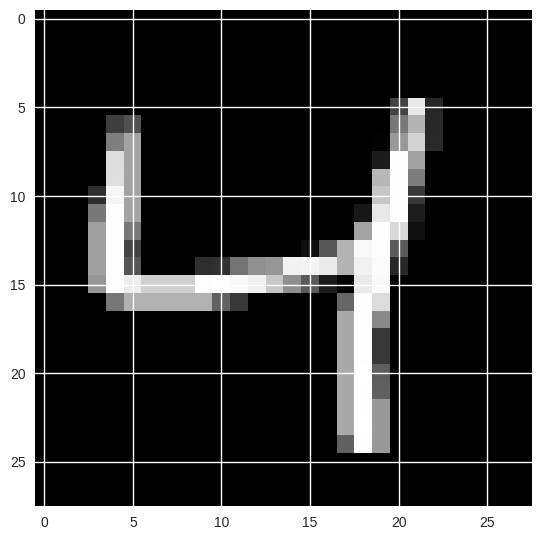

In [ ]:
plt.imshow(X_train[2], cmap="gray");

### Converting to Categorical Data

The to_categorical function in Keras converts a class vector (integers) to a binary class matrix

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

### Flattening 2D Array

In [ ]:
X_train = X_train.reshape(60000, 784)
X_valid = X_valid.reshape(10000, 784)

## Neural Network Architecture
### Capacity
- 16 neurons, 1 hidden layer
- 32 neurons, 1 hidden layer
- 16 neurons, 3 hidden layers

In [ ]:
from tensorflow.keras import layers

input_shape = (784,)

#Regular Model:
#16 neurons, 1 hidden layer
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(10, activation='softmax'),
])

#Increased Dropout Model:
#16 neurons, 1 hidden layer
model_Drop = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.6),
    layers.Dense(10, activation='softmax'),
])

#Wider Model:
#32 neurons, 1 hidden layer
# Doubled amount of neurons per layer
modelW = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(10, activation='softmax'),
])

#Deeper Model:
#16 neuron, 3 hidden layers
modelD = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(10, activation='softmax'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Softmax

Softmax activation function - transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

## Training Process

### Adding the optimizer, loss, and metric to each model

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model1.summary()

model_Drop.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model1.summary()

modelW.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
modelW.summary()

modelD.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
modelD.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,930 (62.23 KB)

 Trainable params: 14,330 (55.98 KB)

 Non-trainable params: 1,600 (6.25 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,930 (62.23 KB)

 Trainable params: 14,330 (55.98 KB)

 Non-trainable params: 1,600 (6.25 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_4                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,714 (112.16 KB)

 Trainable params: 27,082 (105.79 KB)

 Non-trainable params: 1,632 (6.38 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_6                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,602 (64.85 KB)

 Trainable params: 14,938 (58.35 KB)

 Non-trainable params: 1,664 (6.50 KB)

### First Model

Adam:

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3920 - loss: 1.9171 - val_accuracy: 0.7234 - val_loss: 0.9145
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7770 - loss: 0.8261 - val_accuracy: 0.8416 - val_loss: 0.5459
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8305 - loss: 0.6289 - val_accuracy: 0.8771 - val_loss: 0.4272
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8527 - loss: 0.5440 - val_accuracy: 0.8991 - val_loss: 0.3680
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8659 - loss: 0.4890 - val_accuracy: 0.9073 - val_loss: 0.3363
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8722 - loss: 0.4554 - val_accuracy: 0.9139 - val_loss: 0.3151
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8770 - loss: 0.4325 - val_accuracy: 0.9155 - val_loss: 0.3056
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8827 - loss: 0.4102 - val_accuracy: 0.9187 - v

<Axes: title={'center': 'Accuracy (Adam)'}>

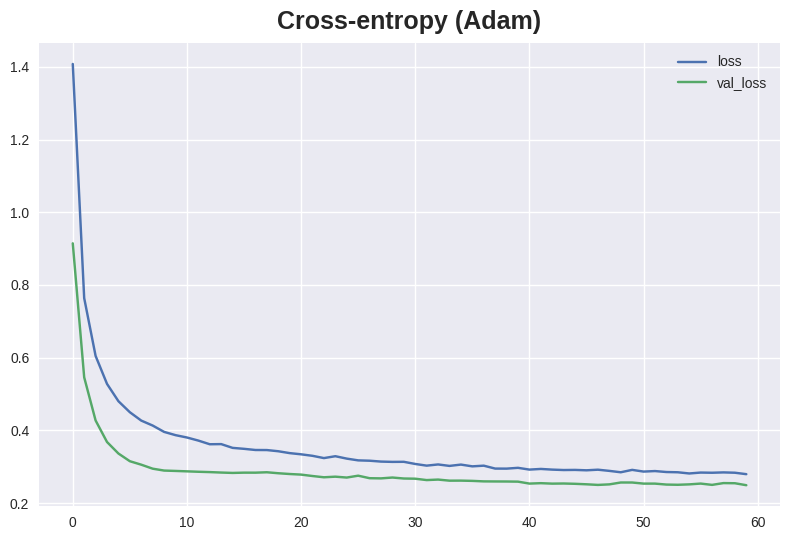

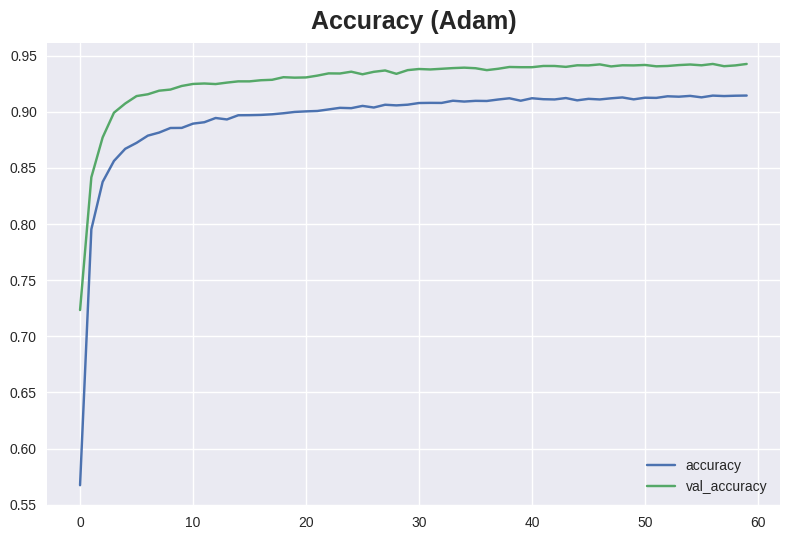

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = EarlyStopping(
    min_delta=0.001, # 0.001 minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=60,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Adam)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Adam)")

SGD:

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9066 - loss: 0.3072 - val_accuracy: 0.9350 - val_loss: 0.2736
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9052 - loss: 0.3143 - val_accuracy: 0.9344 - val_loss: 0.2727
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9088 - loss: 0.3082 - val_accuracy: 0.9349 - val_loss: 0.2724
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9082 - loss: 0.3066 - val_accuracy: 0.9351 - val_loss: 0.2722
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9066 - loss: 0.3071 - val_accuracy: 0.9351 - val_loss: 0.2721
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9085 - loss: 0.3043 - val_accuracy: 0.9351 - val_loss: 0.2718
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9071 - loss: 0.2993 - val_accuracy: 0.9350 - val_loss: 0.2715
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9056 - loss: 0.3115 - val_accuracy: 0.9349 - v

<Axes: title={'center': 'Accuracy (SGD)'}>

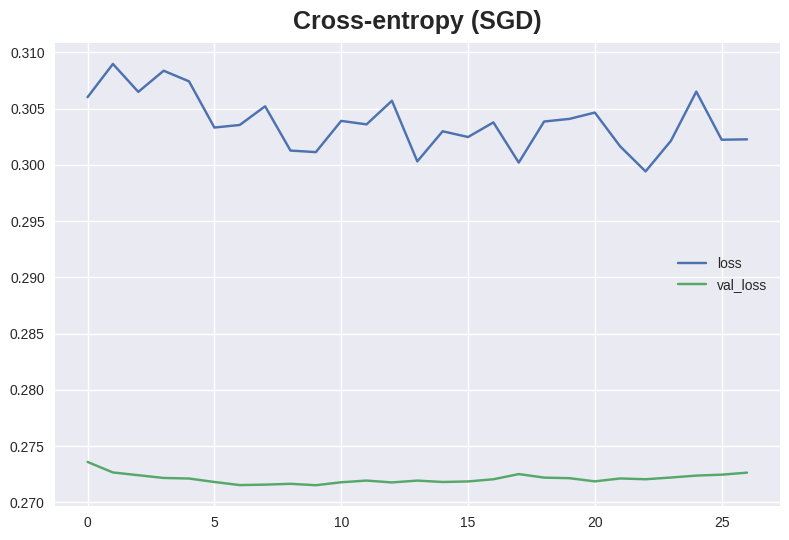

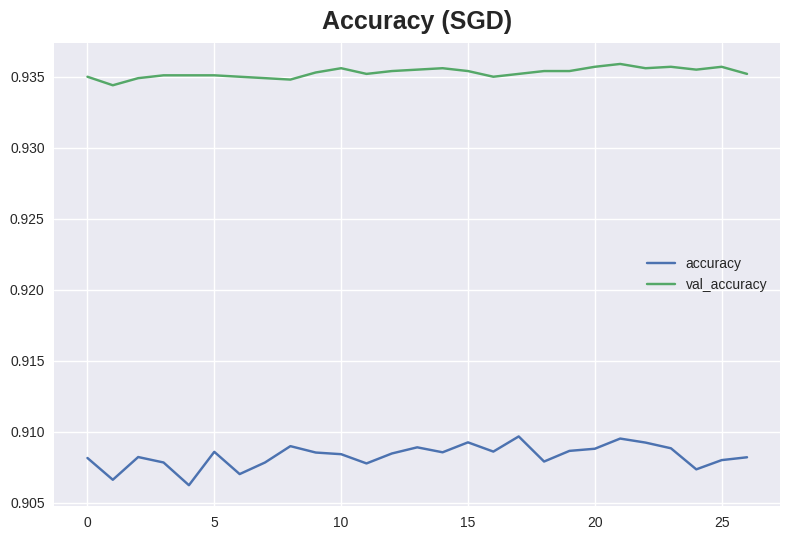

In [ ]:
model1.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size = 1000,
    epochs=60,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (SGD)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (SGD)")


Adjusted Learning Rate

<KerasVariable shape=(), dtype=float32, path=adam/learning_rate>
Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9170 - loss: 0.2710 - val_accuracy: 0.9446 - val_loss: 0.2237
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9155 - loss: 0.2735 - val_accuracy: 0.9447 - val_loss: 0.2241
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9168 - loss: 0.2679 - val_accuracy: 0.9454 - val_loss: 0.2259
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9171 - loss: 0.2688 - val_accuracy: 0.9459 - val_loss: 0.2233
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9162 - loss: 0.2754 - val_accuracy: 0.9455 - val_loss: 0.2204
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9178 - loss: 0.2703 - val_accuracy: 0.9453 - val_loss: 0.2224
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9175 - loss: 0.2708 - val_accuracy: 0.9455 - val_loss: 0.2231
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

<Axes: title={'center': 'Accuracy (Adam)'}>

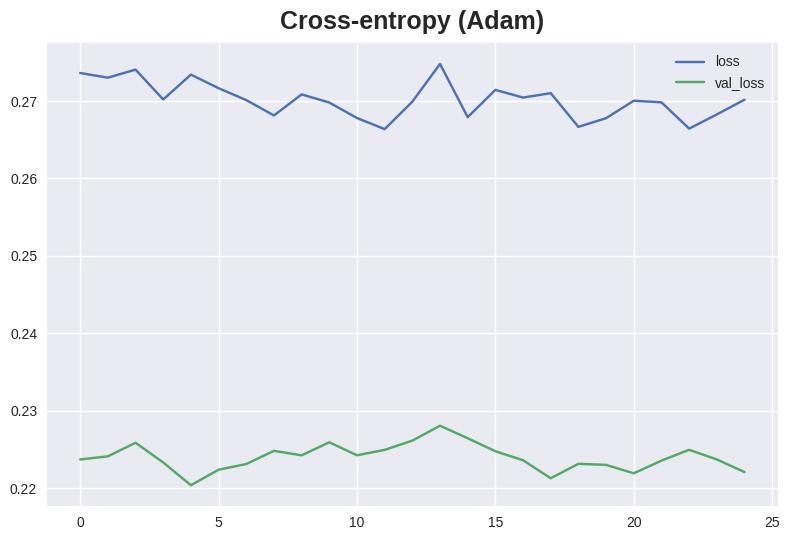

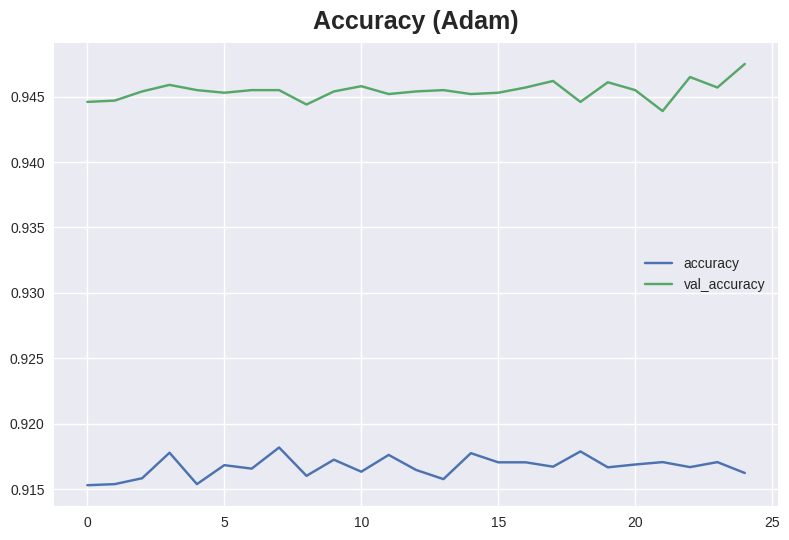

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

optimizer = tensorflow.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(1)
print(optimizer.learning_rate)

early_stopping = EarlyStopping(
    min_delta=0.001, # 0.001 minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=60,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Adam)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Adam)")

Increased Batch Size:

```
batch_size=3000
```

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.2141 - loss: 2.4109 - val_accuracy: 0.5174 - val_loss: 1.5717
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6010 - loss: 1.3032 - val_accuracy: 0.6786 - val_loss: 1.0172
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7108 - loss: 1.0306 - val_accuracy: 0.7758 - val_loss: 0.7736
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7639 - loss: 0.8838 - val_accuracy: 0.8224 - val_loss: 0.6381
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7949 - loss: 0.7806 - val_accuracy: 0.8537 - val_loss: 0.5436
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8104 - loss: 0.7178 - val_accuracy: 0.8707 - val_loss: 0.4862
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8256 - loss: 0.6590 - val_accuracy: 0.8810 - val_loss: 0.4460
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8384 - loss: 0.6148 - val_accuracy: 0.8889 - v

<Axes: title={'center': 'Accuracy (Increased Batch Size)'}>

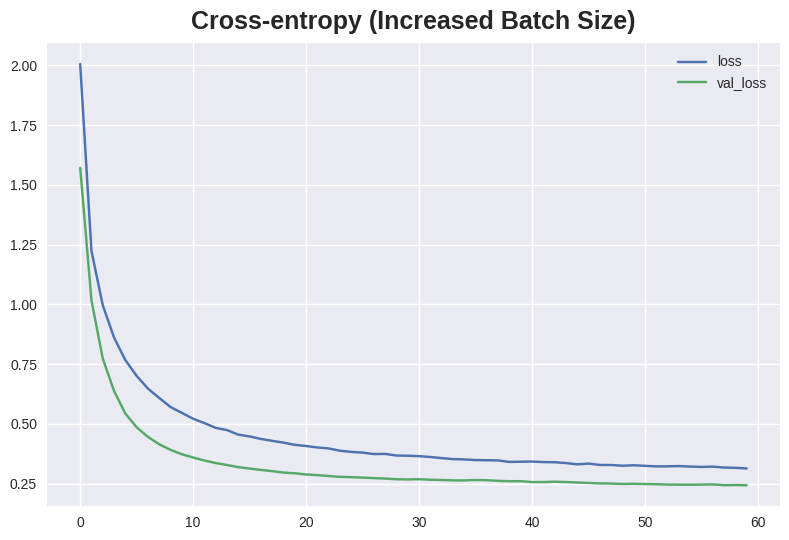

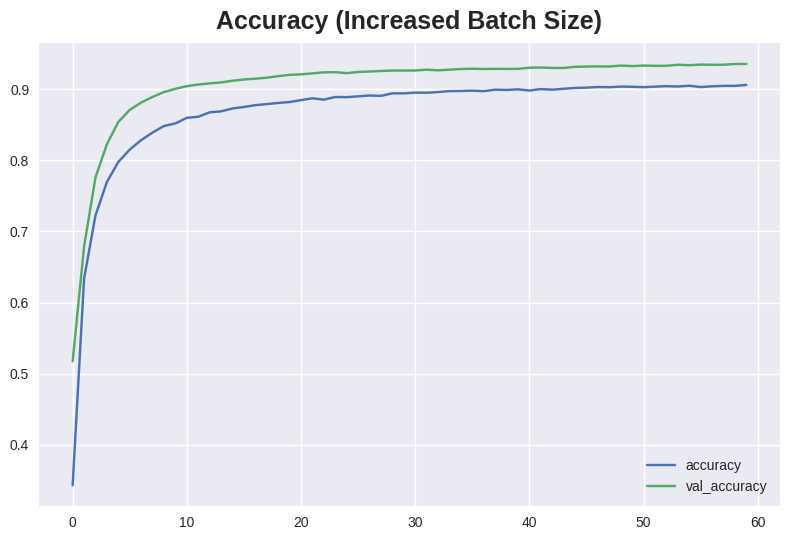

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = EarlyStopping(
    min_delta=0.001, # 0.001 minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=3000,
    epochs=60,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Increased Batch Size)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Increased Batch Size)")

Increased Epoch Length and Removing Early stopping:
```
epochs=200
```

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3875 - loss: 1.8432 - val_accuracy: 0.7715 - val_loss: 0.8066
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7705 - loss: 0.8896 - val_accuracy: 0.8486 - val_loss: 0.5628
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8252 - loss: 0.6772 - val_accuracy: 0.8827 - val_loss: 0.4488
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8459 - loss: 0.5812 - val_accuracy: 0.9016 - val_loss: 0.3806
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8596 - loss: 0.5211 - val_accuracy: 0.9098 - val_loss: 0.3449
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8643 - loss: 0.4802 - val_accuracy: 0.9151 - val_loss: 0.3238
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8728 - loss: 0.4540 - val_accuracy: 0.9158 - val_loss: 0.3098
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8786 - loss: 0.4253 - val_accuracy: 0.

<Axes: title={'center': 'Accuracy (Increased Epoch Length)'}>

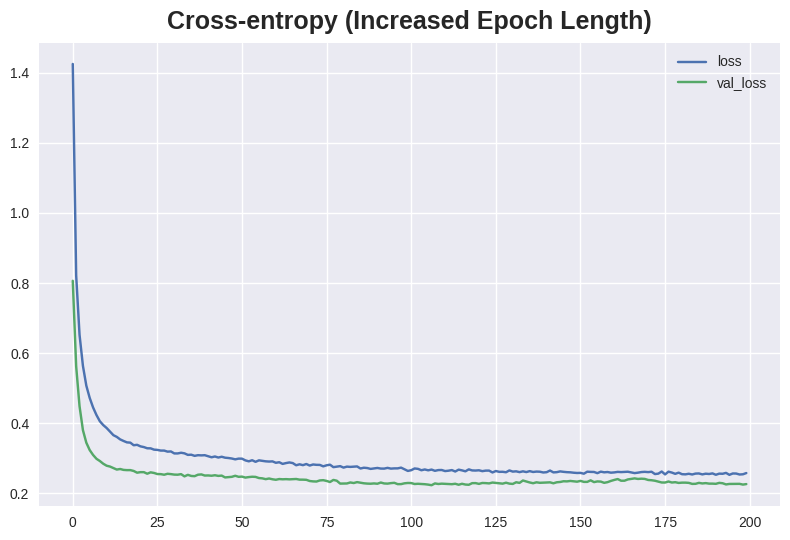

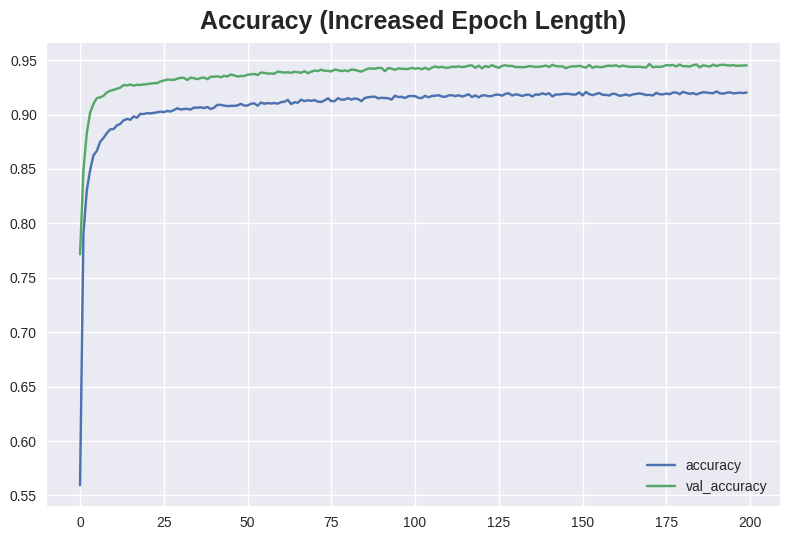

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

history = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=200,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Increased Epoch Length)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Increased Epoch Length)")

Increased Drop Out Rate

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2962 - loss: 2.3201 - val_accuracy: 0.7483 - val_loss: 0.8480
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5981 - loss: 1.2284 - val_accuracy: 0.8307 - val_loss: 0.6148
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6733 - loss: 1.0270 - val_accuracy: 0.8657 - val_loss: 0.5142
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7082 - loss: 0.9187 - val_accuracy: 0.8823 - val_loss: 0.4530
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7307 - loss: 0.8506 - val_accuracy: 0.8907 - val_loss: 0.4154
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7464 - loss: 0.8058 - val_accuracy: 0.8956 - val_loss: 0.3942
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7577 - loss: 0.7689 - val_accuracy: 0.9001 - val_loss: 0.3786
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7643 - loss: 0.7457 - val_accuracy: 0.9026 - v

<Axes: title={'center': 'Accuracy (Drop Out)'}>

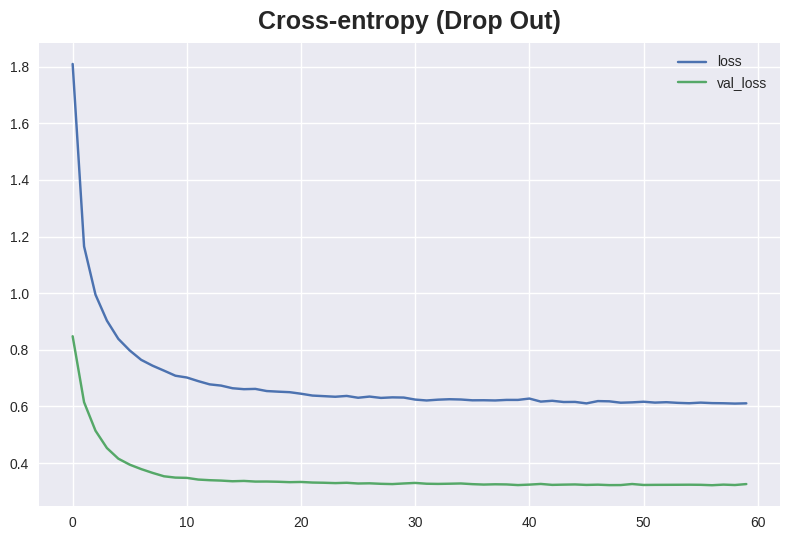

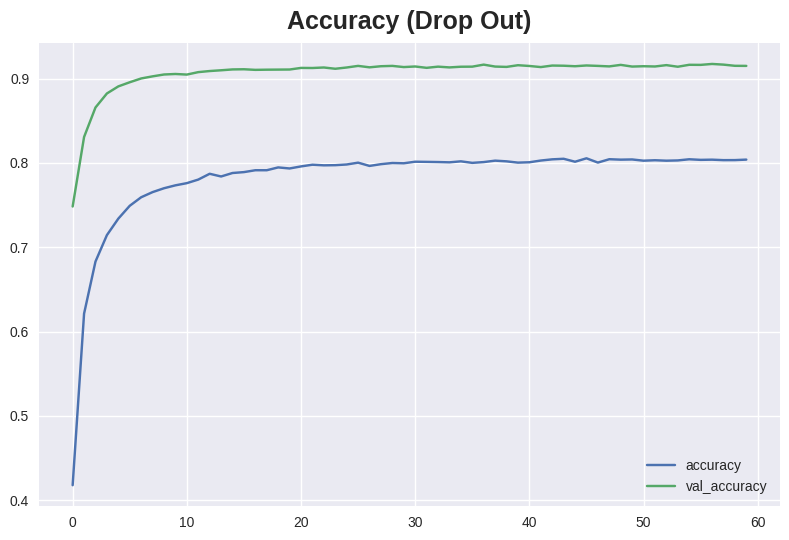

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # 0.001 minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model_Drop.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=60,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Drop Out)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Drop Out)")

### Deeper Model

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1981 - loss: 2.3180 - val_accuracy: 0.5259 - val_loss: 1.4860
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4538 - loss: 1.5866 - val_accuracy: 0.7790 - val_loss: 0.9486
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6064 - loss: 1.2422 - val_accuracy: 0.8462 - val_loss: 0.6586
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6733 - loss: 1.0390 - val_accuracy: 0.8669 - val_loss: 0.5289
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7110 - loss: 0.9209 - val_accuracy: 0.8838 - val_loss: 0.4518
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7408 - loss: 0.8339 - val_accuracy: 0.8959 - val_loss: 0.4020
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7595 - loss: 0.7773 - val_accuracy: 0.8979 - val_loss: 0.3742
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7731 - loss: 0.7420 - val_accuracy: 0.9052 - v

<Axes: title={'center': 'Accuracy (Deeper)'}>

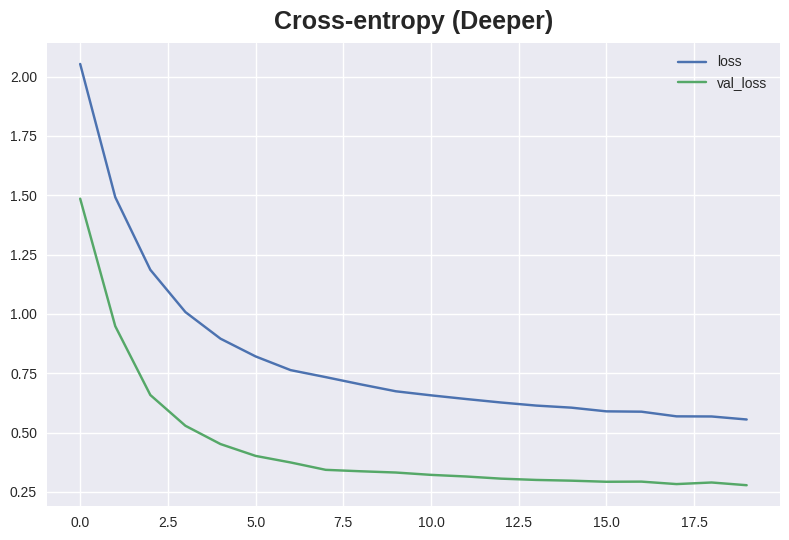

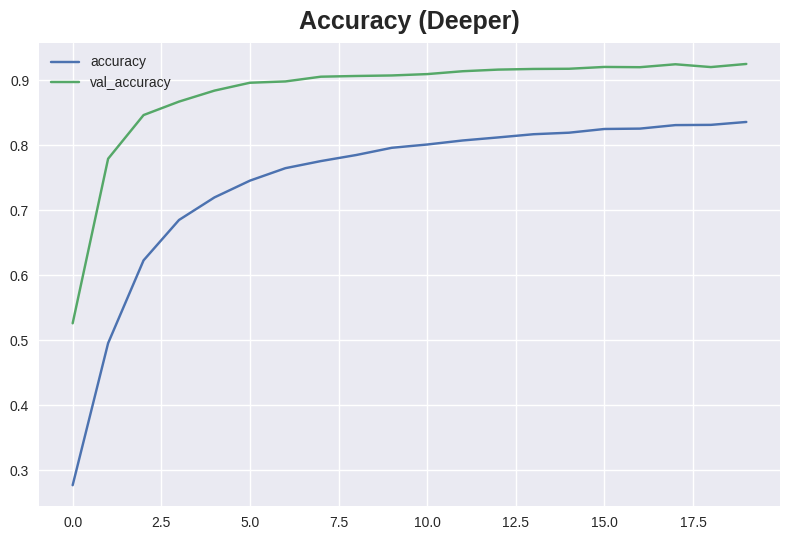

In [ ]:
history = modelD.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=60,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy (Deeper)")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy (Deeper)")

### Wider Model

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4899 - loss: 1.6512 - val_accuracy: 0.8232 - val_loss: 0.6147
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8423 - loss: 0.5661 - val_accuracy: 0.8887 - val_loss: 0.3845
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8786 - loss: 0.4262 - val_accuracy: 0.9112 - val_loss: 0.3074
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8927 - loss: 0.3670 - val_accuracy: 0.9189 - val_loss: 0.2788
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9076 - loss: 0.3228 - val_accuracy: 0.9295 - val_loss: 0.2534
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9121 - loss: 0.3030 - val_accuracy: 0.9332 - val_loss: 0.2410
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9182 - loss: 0.2834 - val_accuracy: 0.9377 - val_loss: 0.2274
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9195 - loss: 0.2723 - val_accuracy: 0.9394 - v

<Axes: title={'center': 'Accuracy'}>

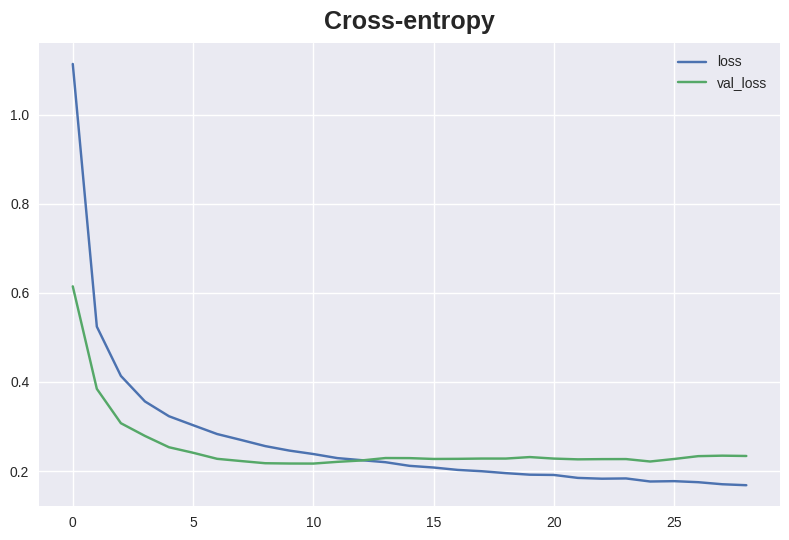

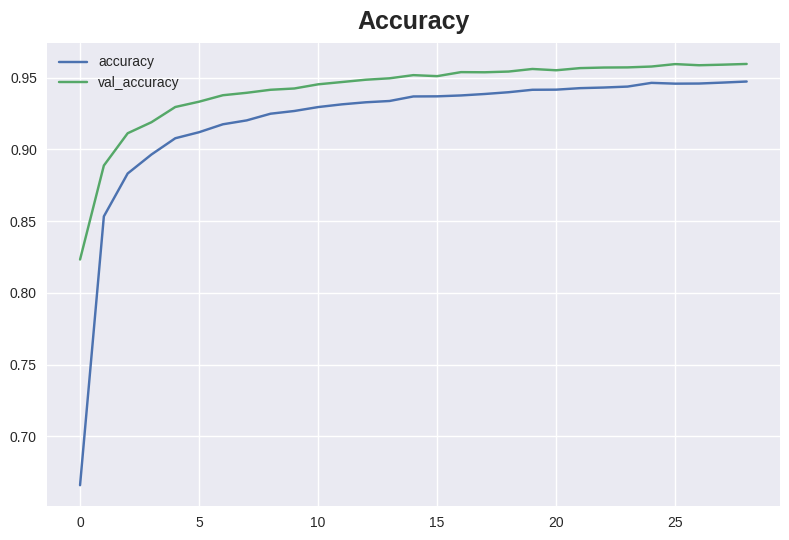

In [ ]:
history = modelW.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1000,
    epochs=60,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## Evaluation
(At current values)

**Model1**


Adam: accuracy: 0.9144 - loss: 0.2806 - val_accuracy: 0.9425 - val_loss: 0.2491

SGD: val_accuracy: 0.9352 val_loss: 0.2726

Both have High accuracy and low loss for both validation and training data. Both are underfitting slightly

Increased batch size: accuracy: 0.9167 - loss: 0.2659 - val_accuracy: 0.9448 - val_loss: 0.2522

Increased epoch length: accuracy: 0.9217 - loss: 0.2561 - val_accuracy: 0.9452 - val_loss: 0.2268

Adjusted Learning Rate: accuracy: 0.9169 - loss: 0.2691 - val_accuracy: 0.9475 - val_loss: 0.2221


Increased batch size and Increased epoch length both have higher accuracy than the original model but both still underfit

**Higher Drop Out Rate Model**
accuracy: 0.8057 - loss: 0.6051 - val_accuracy: 0.9150 - val_loss: 0.3257

Lower recorded accuracy and higher overall loss

**Deeper Model**

It would appear that the deeper model is underfitting but has a high accuracy

**Wider Model**

It would appear that the wider model (more neurons) is overfitting but has high accuracy

Larger
**Overall the first model performed the best**

###Visualizing Incorrect Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


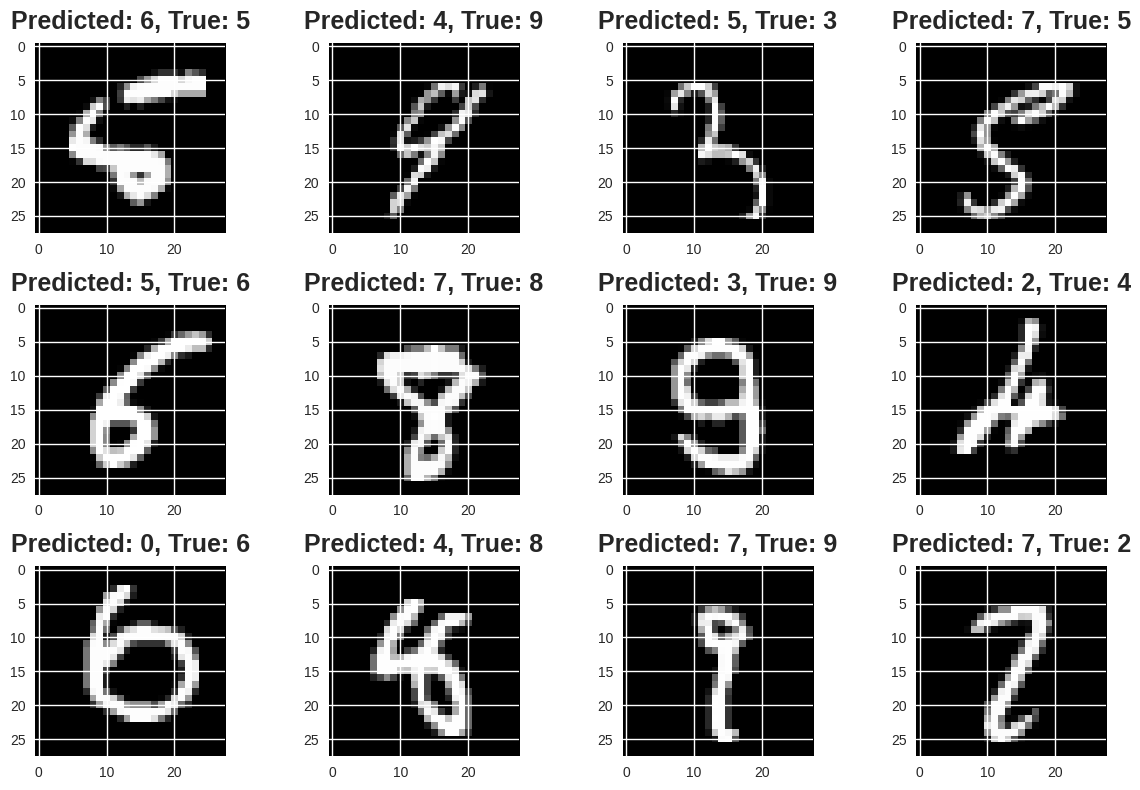

In [ ]:
predictions = model1.predict(X_valid)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_valid, axis=1)

#Finding where the model incorrectly predicted values
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Plotting the first 12 incorrect predictions
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_valid[incorrect_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[incorrect_indices[i]]}, True: {true_labels[incorrect_indices[i]]}")
plt.show()

Reasons why the model might have failed on these particular images:

The first and fifth values appear to have been mixed up by the model. The model believes the first value looks like a 6 due to the presence of a loop and the fifth looks like a 5 due to the high concentration of lighter pixels at the end of the loop making the model believe the 6 is not connected and thus a 5. The seventh is supposed to be a 9 but looks like a 5 to the model because of the segments that make up its tail being similar to a 5. This must take priority in the model's determination of whether or not the number is a 9 or 5 in some hidden layer.

This mistakes are due to how the model predicts the numbers using charactaristic "segments" of pixels as part of the number. These are further developed into larger aspects of the numbers such as "loops" in numbers such as 9 or 6 in deeper hidden layers of the model.